# Mercedes-Benz Greener Manufacturing

#### The first part of the notebook (data exploration) is forked from a kernel shared by : https://www.kaggle.com/sudalairajkumar

### Challenge objective

Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include, for example, the passenger safety cell with crumple zone, the airbag and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium car makers. Daimler’s Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams. .

To ensure the safety and reliability of each and every unique car configuration before they hit the road, Daimler’s engineers have developed a robust testing system. But, optimizing the speed of their testing system for so many possible feature combinations is complex and time-consuming without a powerful algorithmic approach. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Daimler’s production lines.

<img src="https://kaggle2.blob.core.windows.net/competitions/kaggle/6565/media/daimler-mercedes%20V02.jpg">

In this competition, Daimler is challenging Kagglers to tackle the curse of dimensionality and reduce the time that cars spend on the test bench. Competitors will work with a dataset representing different permutations of Mercedes-Benz car features to predict the time it takes to pass testing. Winning algorithms will contribute to speedier testing, resulting in lower carbon dioxide emissions without reducing Daimler’s standards.

### Beginning

In this notebook, let us explore the dataset that is given for this competition.

**Objective:**

This dataset contains an anonymized set of variables that describe different Mercedes cars. The ground truth is labeled 'y' and represents the time (in seconds) that the car took to pass testing. 

Let us first import the necessary modules.

In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import xgboost as xgb
color = sns.color_palette()

%matplotlib inline

from subprocess import check_output
print(check_output(["ls", "./data"]).decode("utf8"))

import warnings
warnings.filterwarnings('ignore')

sample_submission.csv
test.csv
train.csv



In [2]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")
print("Train shape : ", train_df.shape)
print("Test shape : ", test_df.shape)

Train shape :  (4209, 378)
Test shape :  (4209, 377)


Wow the number of rows are small with 388 columns. We should try not to overfit :)

Let us look at the top few rows.

In [3]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_df.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Target Variable:**

"y" is the variable we need to predict. So let us do some analysis on this variable first.

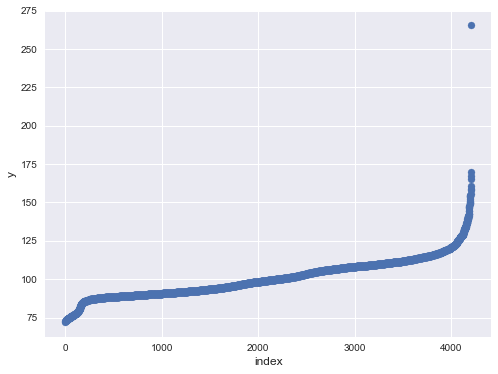

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

Seems like a single data point is well above the rest. 

Now let us plot the distribution graph.

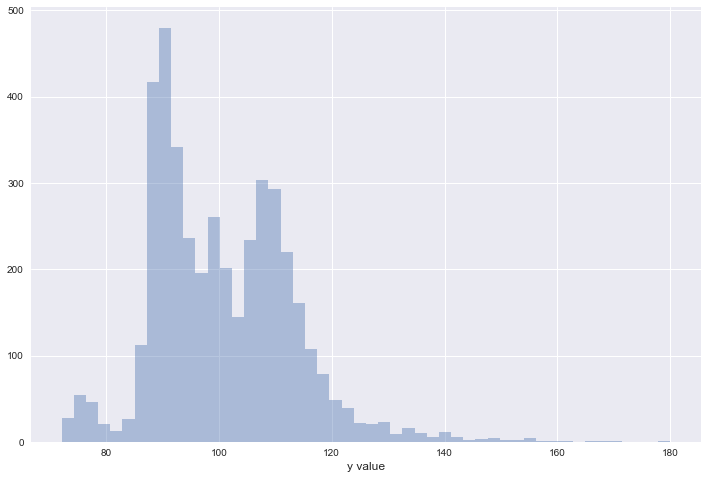

In [6]:
ulimit = 180
train_df['y'].ix[train_df['y']>ulimit] = ulimit

plt.figure(figsize=(12,8))
sns.distplot(train_df.y.values, bins=50, kde=False)
plt.xlabel('y value', fontsize=12)
plt.show()

Now let us have a look at the data type of all the variables present in the dataset.

In [7]:
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,369
1,float64,1
2,object,8


So majority of the columns are integers with 8 categorical columns and 1 float column (target variable)

In [8]:
dtype_df.ix[:10,:]

,Count,Column Type
0,ID,int64
1,y,float64
2,X0,object
3,X1,object
4,X2,object
5,X3,object
6,X4,object
7,X5,object
8,X6,object
9,X8,object


X0 to X8 are the categorical columns.

**Missing values:**

Let us now check for the missing values.

In [9]:
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count


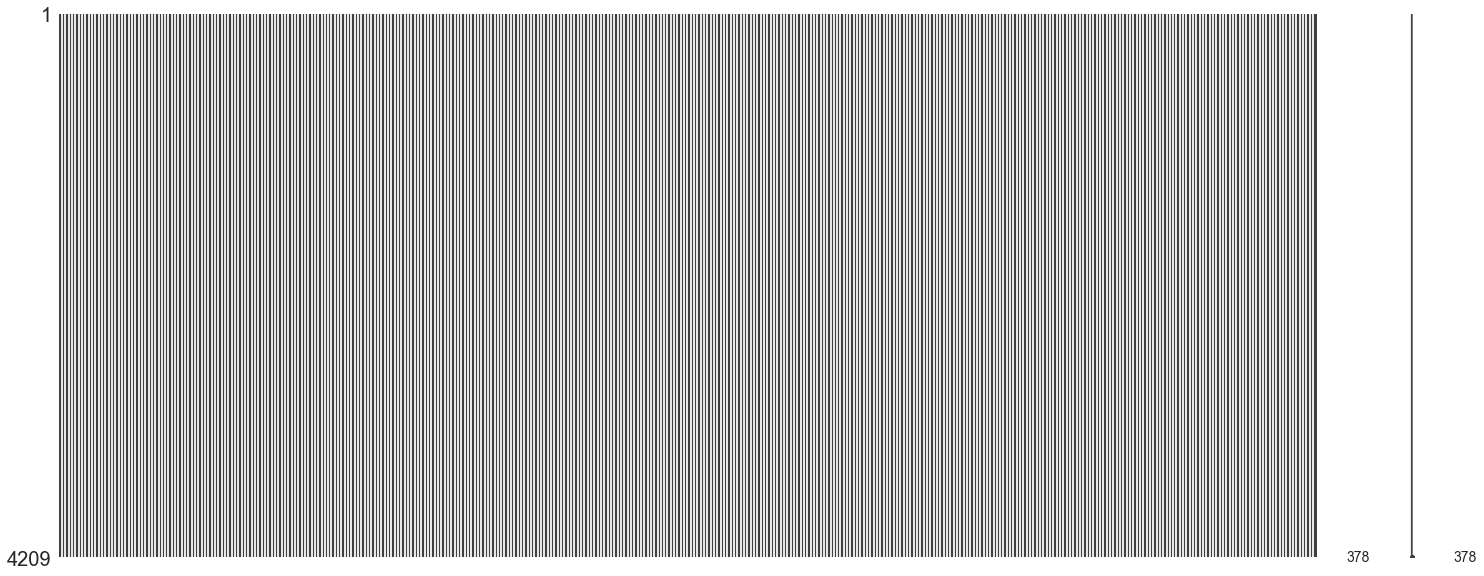

In [10]:
import missingno as msno
msno.matrix(train_df)

Good to see that there are no missing values in the dataset :) 

**Integer Columns Analysis:**

In [11]:
unique_values_dict = {}
for col in train_df.columns:
    if col not in ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        unique_value = str(np.sort(train_df[col].unique()).tolist())
        tlist = unique_values_dict.get(unique_value, [])
        tlist.append(col)
        unique_values_dict[unique_value] = tlist[:]
for unique_val, columns in unique_values_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print(columns)
    print("--------------------------------------------------")
        

Columns containing the unique values :  [0, 1]
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145'

So all the integer columns are binary with some columns have only one unique value 0. Possibly we could exclude those columns in our modeling activity.

Now let us explore the categorical columns present in the dataset.

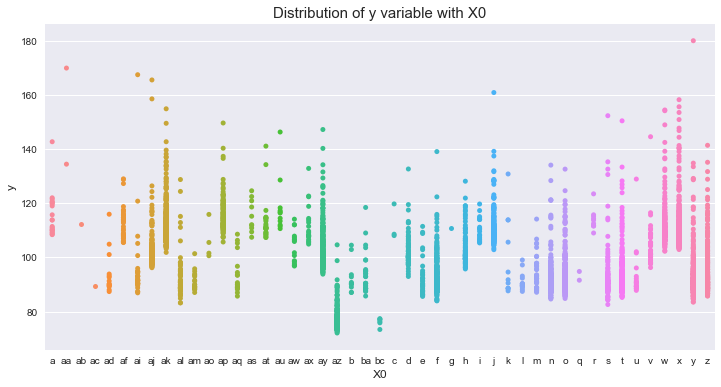

In [12]:
var_name = "X0"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

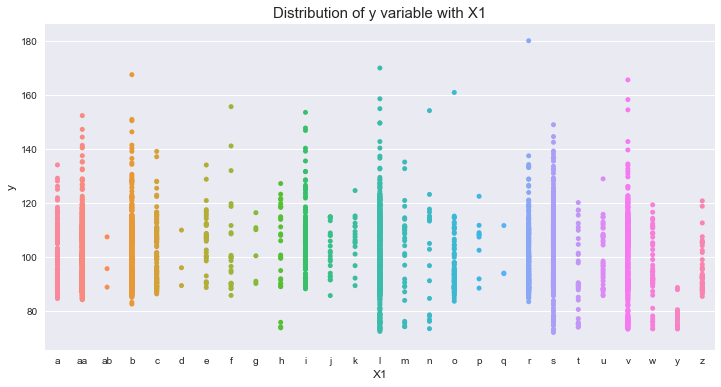

In [13]:
var_name = "X1"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

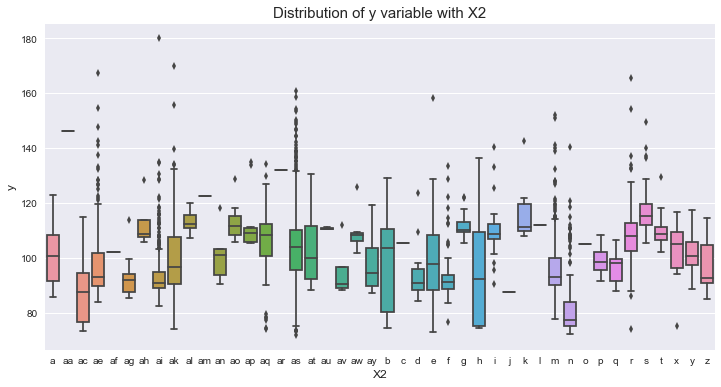

In [14]:
var_name = "X2"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

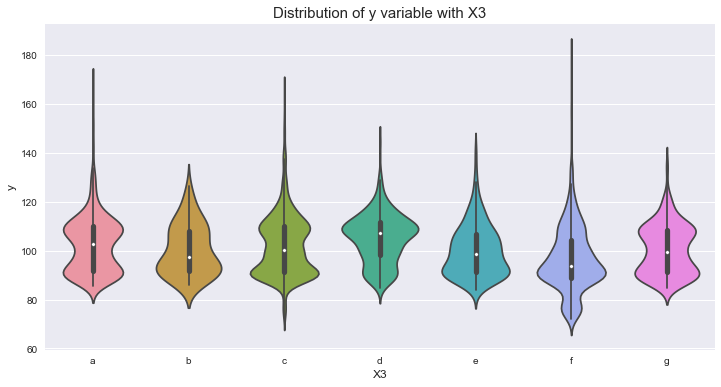

In [15]:
var_name = "X3"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

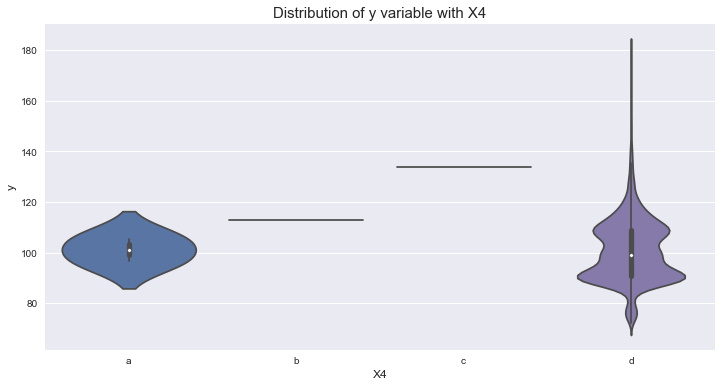

In [16]:
var_name = "X4"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

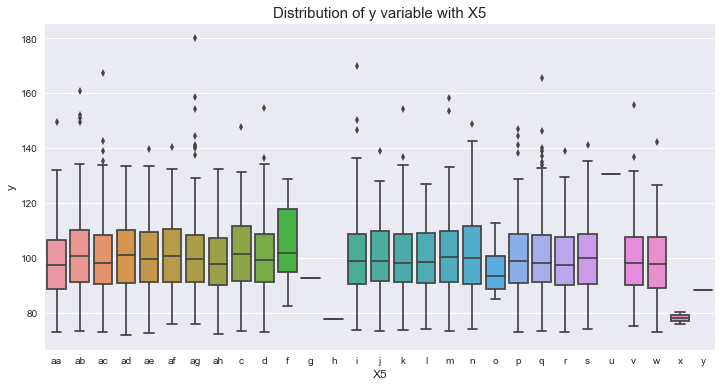

In [17]:
var_name = "X5"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

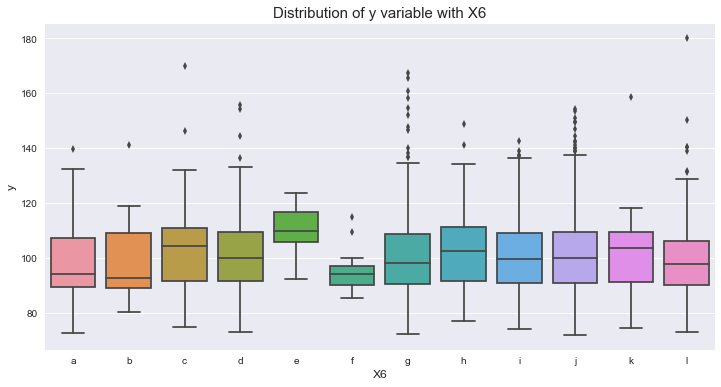

In [18]:
var_name = "X6"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

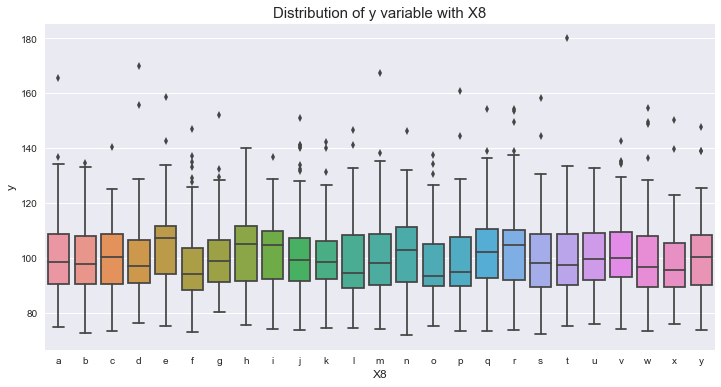

In [19]:
var_name = "X8"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

**Binary Variables:**

Now we can look into the binary variables. There are quite a few of them as we have seen before. Let us start with getting the number of 0's and 1's in each of these variables.

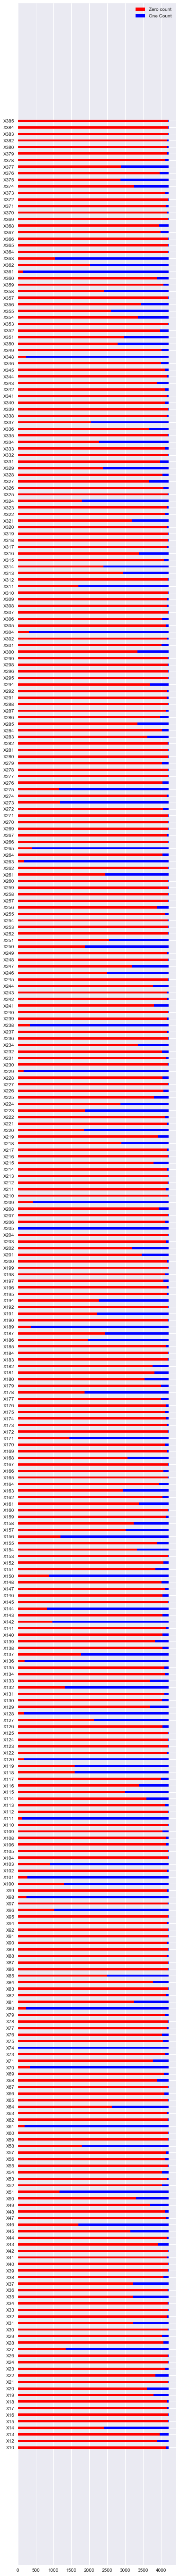

In [20]:
zero_count_list = []
one_count_list = []
cols_list = unique_values_dict['[0, 1]']
for col in cols_list:
    zero_count_list.append((train_df[col]==0).sum())
    one_count_list.append((train_df[col]==1).sum())

N = len(cols_list)
ind = np.arange(N)
width = 0.35

plt.figure(figsize=(6,100))
p1 = plt.barh(ind, zero_count_list, width, color='red')
p2 = plt.barh(ind, one_count_list, width, left=zero_count_list, color="blue")
plt.yticks(ind, cols_list)
plt.legend((p1[0], p2[0]), ('Zero count', 'One Count'))
plt.show()

Now let us check the mean y value in each of the binary variable.

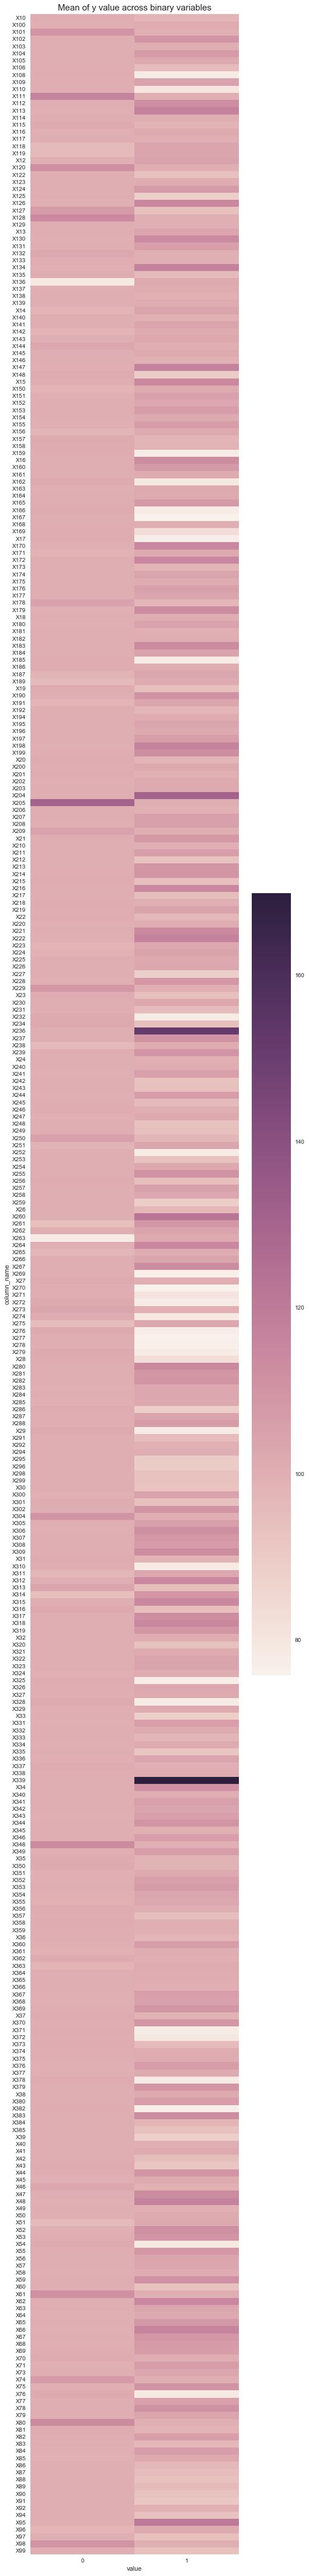

In [21]:

zero_mean_list = []
one_mean_list = []
cols_list = unique_values_dict['[0, 1]']
for col in cols_list:
    zero_mean_list.append(train_df.ix[train_df[col]==0].y.mean())
    one_mean_list.append(train_df.ix[train_df[col]==1].y.mean())

new_df = pd.DataFrame({"column_name":cols_list+cols_list, "value":[0]*len(cols_list) + [1]*len(cols_list), "y_mean":zero_mean_list+one_mean_list})
new_df = new_df.pivot('column_name', 'value', 'y_mean')

plt.figure(figsize=(8,80))
sns.heatmap(new_df)
plt.title("Mean of y value across binary variables", fontsize=15)
plt.show()

Binary variables which shows a good color difference in the above graphs between 0 and 1 are likely to be more predictive given the the count distribution is also good between both the classes (can be seen from the previous graph). We will dive more into the important variables in the later part of the notebook.

**ID variable:**

One more important thing we need to look at it is ID variable. This will give an idea of how the splits are done across train and test (random or id based) and also to help see if ID has some potential prediction capability (probably not so useful for business)

Let us first see how the 'y' variable changes with ID variable.

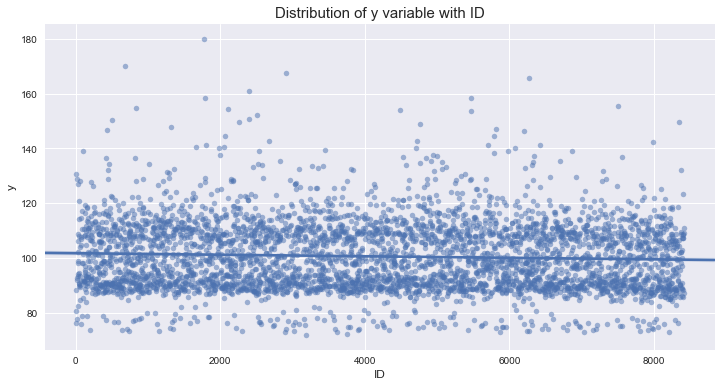

In [22]:
var_name = "ID"
plt.figure(figsize=(12,6))
sns.regplot(x=var_name, y='y', data=train_df, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

There seems to be a slight decreasing trend with respect to ID variable. Now let us see how the IDs are distributed across train and test.

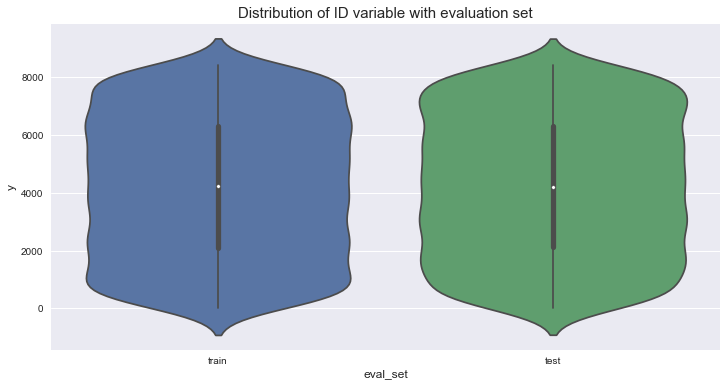

In [23]:
plt.figure(figsize=(6,10))
train_df['eval_set'] = "train"
test_df['eval_set'] = "test"
full_df = pd.concat([train_df[["ID","eval_set"]], test_df[["ID","eval_set"]]], axis=0)

plt.figure(figsize=(12,6))
sns.violinplot(x="eval_set", y='ID', data=full_df)
plt.xlabel("eval_set", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of ID variable with evaluation set", fontsize=15)
plt.show()

Seems like a random split of ID variable between train and test samples.

**Important Variables:**

Now let us run and xgboost model to get the important variables.

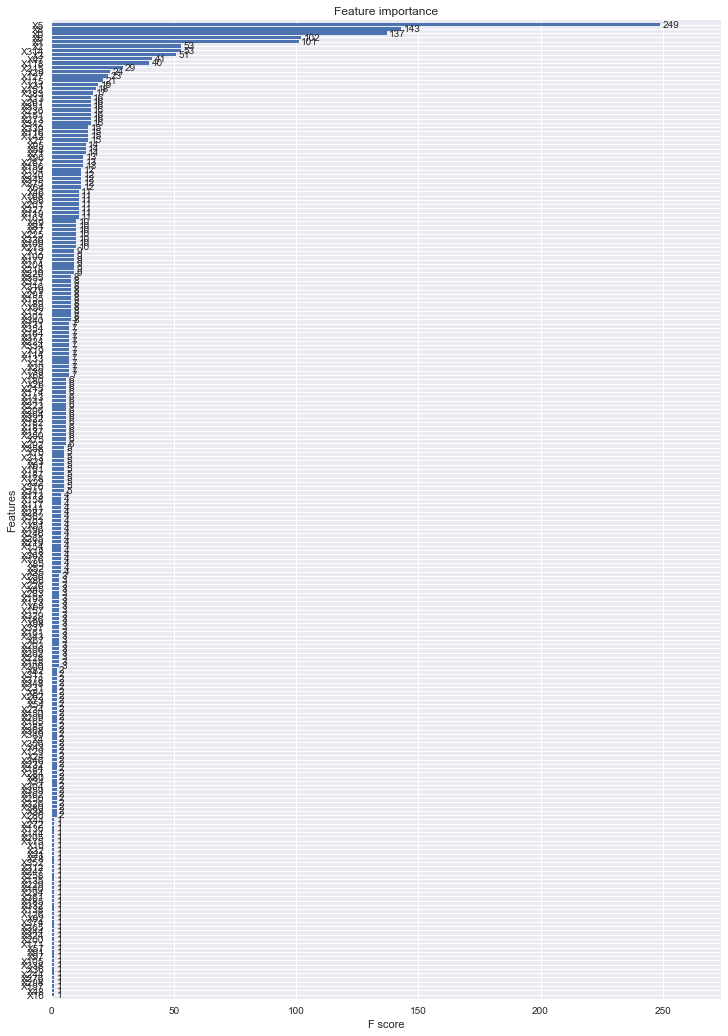

In [28]:
for f in ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_df[f].values)) 
        train_df[f] = lbl.transform(list(train_df[f].values))
        
train_y = train_df['y'].values
train_X = train_df.drop(["ID", "y", "eval_set"], axis=1)

# Thanks to anokas for this #
def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100, feval=xgb_r2_score, maximize=True)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, height=0.8, ax=ax)
plt.show()

In [55]:
for f in ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(test_df[f].values)) 
        test_df[f] = lbl.transform(list(test_df[f].values))

test_X = test_df.drop(["ID", "eval_set"], axis=1)
dtest = xgb.DMatrix(test_X, feature_names=test_X.columns.values)

In [69]:
y_test = model.predict(dtest)
y_test_df = pd.Series(y_test,name = 'y')
df_submission = pd.concat([test_df['ID'], y_test_df],axis=1)
df_submission.to_csv("submission.csv",index=False)

### Trying random Forest Regressor

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import roc_auc_score
import numpy as np

%timeit
model = RandomForestRegressor(n_estimators=100,max_depth=5,oob_score = True,n_jobs = -1,random_state =1)
model.fit(train_X,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [83]:
y_test = model.predict(test_X)
y_test_df = pd.Series(y_test,name = 'y')
df_submission = pd.concat([test_df['ID'], y_test_df],axis=1)
df_submission.to_csv("submission.csv",index=False)

### Random Forest with split

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
X_valid = test_X
from sklearn.model_selection import train_test_split
X = train_X
y = train_y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)
from sklearn.model_selection import train_test_split
X = train_X
y = train_y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=100,max_depth=5,oob_score = True,n_jobs = -1,random_state =1)

In [ ]:
# REGRESSOR HYPER PARAMETERS FOR RANDOM SEARCH
alphas = np.logspace(np.log10(1e1), np.log10(1e1 * 1e-3), num=50)
l1_ratios = [.1, .5, .7, .9, .95, .99, 1]
param_dist = {"alpha": alphas, "l1_ratio": l1_ratios}
n_iter_search = 30

# ELASTICNET
# Casual users
cl = ElasticNet()
random_search = RandomizedSearchCV(
    cl,
    param_distributions=param_dist,
    n_iter= n_iter_search,
    # scoring='neg_mean_squared_error'
    scoring='neg_mean_absolute_error'
)
random_search.fit(X_train, y_train)
# Uses best classifier
y_pred = random_search.predict(X_test)
print("Casual R2 score: %s" % r2_score(y_true=y_test, y_pred=y_pred))
print("Casual Explained variance: %s" %
      explained_variance_score(y_test, y_pred))
print("Casual Mean square error: %s" % mean_squared_error(y_test, y_pred))
print("Casual Mean absolute error: %s" % mean_absolute_error(y_test, y_pred))

In [ ]:
y_test = model.predict(test_X)
y_test_df = pd.Series(y_test,name = 'y')
df_submission = pd.concat([test_df['ID'], y_test_df],axis=1)
df_submission.to_csv("submission.csv",index=False)

### Trying linear regression

In [92]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
X_valid = test_X

In [93]:
from sklearn.model_selection import train_test_split
X = train_X
y = train_y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [94]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
# Polynomial preprocessing: many features are correlated
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

In [95]:
# REGRESSOR HYPER PARAMETERS FOR RANDOM SEARCH
alphas = np.logspace(np.log10(1e1), np.log10(1e1 * 1e-3), num=50)
l1_ratios = [.1, .5, .7, .9, .95, .99, 1]
param_dist = {"alpha": alphas, "l1_ratio": l1_ratios}
n_iter_search = 30

# ELASTICNET
# Casual users
cl = ElasticNet()
random_search = RandomizedSearchCV(
    cl,
    param_distributions=param_dist,
    n_iter= n_iter_search,
    # scoring='neg_mean_squared_error'
    scoring='neg_mean_absolute_error'
)
random_search.fit(X_train, y_train)
# Uses best classifier
y_pred = random_search.predict(X_test)
print("Casual R2 score: %s" % r2_score(y_true=y_test, y_pred=y_pred))
print("Casual Explained variance: %s" %
      explained_variance_score(y_test, y_pred))
print("Casual Mean square error: %s" % mean_squared_error(y_test, y_pred))
print("Casual Mean absolute error: %s" % mean_absolute_error(y_test, y_pred))

Casual R2 score: 0.585638547237
Casual Explained variance: 0.585753024993
Casual Mean square error: 64.4953351136
Casual Mean absolute error: 5.3600420748


In [98]:
X_valid = scaler.transform(X_valid)
y_valid = random_search.predict(X_valid)
y_valid_df = pd.Series(y_valid,name = 'y')
df_submission = pd.concat([test_df['ID'], y_valid_df],axis=1)
df_submission.to_csv("submission.csv",index=False)

In [104]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "./data"]).decode("utf8"))

# Any results you write to the current directory are saved as output.
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

for c in train.columns:
    if train[c].dtype == 'object':
        lbl = LabelEncoder() 
        lbl.fit(list(train[c].values) + list(test[c].values)) 
        train[c] = lbl.transform(list(train[c].values))
        test[c] = lbl.transform(list(test[c].values))

from sklearn.decomposition import PCA
pca2 = PCA(n_components=5)
pca2_results = pca2.fit_transform(train.drop(["y"], axis=1))
train['pca0']=pca2_results[:,0]
train['pca1']=pca2_results[:,1]
train['pca2']=pca2_results[:,2]
train['pca3']=pca2_results[:,3]
train['pca4']=pca2_results[:,4]
pca2_results = pca2.transform(test)
test['pca0']=pca2_results[:,0]
test['pca1']=pca2_results[:,1]
test['pca2']=pca2_results[:,2]
test['pca3']=pca2_results[:,3]
test['pca4']=pca2_results[:,4]

y_train = train["y"]
y_mean = np.mean(y_train)
train.drop('y', axis=1, inplace=True)

import xgboost as xgb
xgb_params = {
    'eta': 0.039,
    'max_depth': 4,
    'subsample': 0.95,
    # 'colsample_bytree': 0.95,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': y_mean,
    'silent': 1
}

dtrain = xgb.DMatrix(train, y_train)
dtest = xgb.DMatrix(test)


# Uncomment to tune XGB `num_boost_rounds`

cv_result = xgb.cv(xgb_params, dtrain, num_boost_round=1000, early_stopping_rounds=20,
   verbose_eval=True, show_stdv=False)

num_boost_rounds = len(cv_result)
print(num_boost_rounds)
num_boost_round = 489
#num_boost_round = 40

model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_boost_rounds)

y_pred = model.predict(dtest)
output = pd.DataFrame({'id': test['ID'], 'y': y_pred})
output.to_csv('result.csv', index=False)

sample_submission.csv
test.csv
train.csv

[0]	train-rmse:12.3915	test-rmse:12.3964
[1]	train-rmse:12.1215	test-rmse:12.1341
[2]	train-rmse:11.8685	test-rmse:11.8879
[3]	train-rmse:11.6288	test-rmse:11.6546
[4]	train-rmse:11.4021	test-rmse:11.4356
[5]	train-rmse:11.1877	test-rmse:11.2292
[6]	train-rmse:10.9856	test-rmse:11.0351
[7]	train-rmse:10.7955	test-rmse:10.8522
[8]	train-rmse:10.6155	test-rmse:10.6804
[9]	train-rmse:10.4473	test-rmse:10.5209
[10]	train-rmse:10.2878	test-rmse:10.3709
[11]	train-rmse:10.1385	test-rmse:10.2297
[12]	train-rmse:9.99842	test-rmse:10.0974
[13]	train-rmse:9.86699	test-rmse:9.97504
[14]	train-rmse:9.74472	test-rmse:9.86054
[15]	train-rmse:9.62867	test-rmse:9.75235
[16]	train-rmse:9.51932	test-rmse:9.65452
[17]	train-rmse:9.41758	test-rmse:9.56138
[18]	train-rmse:9.32168	test-rmse:9.47502
[19]	train-rmse:9.23232	test-rmse:9.39587
[20]	train-rmse:9.14831	test-rmse:9.32066
[21]	train-rmse:9.07048	test-rmse:9.24979
[22]	train-rmse:8.99685	test-rmse:9.18581
[2

### Better version of xgboost witch cross validation

In [156]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder


# read datasets
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

# process columns, apply LabelEncoder to categorical features
for c in train.columns:
    if train[c].dtype == 'object':
        lbl = LabelEncoder() 
        lbl.fit(list(train[c].values) + list(test[c].values)) 
        train[c] = lbl.transform(list(train[c].values))
        test[c] = lbl.transform(list(test[c].values))

# shape        
print('Shape train: {}\nShape test: {}'.format(train.shape, test.shape))


##Add decomposed components: PCA / ICA etc.
from sklearn.decomposition import PCA, FastICA
n_comp = 10

# PCA
pca = PCA(n_components=n_comp, random_state=42)
pca2_results_train = pca.fit_transform(train.drop(["y"], axis=1))
pca2_results_test = pca.transform(test)

# ICA
ica = FastICA(n_components=n_comp, random_state=42)
ica2_results_train = ica.fit_transform(train.drop(["y"], axis=1))
ica2_results_test = ica.transform(test)

# Append decomposition components to datasets
for i in range(1, n_comp+1):
    train['pca_' + str(i)] = pca2_results_train[:,i-1]
    test['pca_' + str(i)] = pca2_results_test[:, i-1]
    
    train['ica_' + str(i)] = ica2_results_train[:,i-1]
    test['ica_' + str(i)] = ica2_results_test[:, i-1]
    
y_train = train["y"]
y_mean = np.mean(y_train)



### Regressor
import xgboost as xgb

# prepare dict of params for xgboost to run with
xgb_params = {
    'n_trees': 800, 
    'eta': 0.005,
    'max_depth': 4,
    'subsample': 0.95,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': y_mean, # base prediction = mean(target)
    'silent': 1,
    'lambda': 0.2,
}


# form DMatrices for Xgboost training
dtrain = xgb.DMatrix(train.drop('y', axis=1), y_train)
dtest = xgb.DMatrix(test)

# xgboost, cross-validation
cv_result = xgb.cv(xgb_params, 
                   dtrain, 
                   num_boost_round=1000, # increase to have better results (~700)
                   early_stopping_rounds=50,
                   verbose_eval=10, 
                   show_stdv=False,
                  )

num_boost_rounds = len(cv_result)
print(num_boost_rounds)

# train model
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_boost_rounds)


# check f2-score (to get higher score - increase num_boost_round in previous cell)
from sklearn.metrics import r2_score
print(r2_score(model.predict(dtrain), dtrain.get_label()))

# make predictions and save results
y_pred = model.predict(dtest)

output = pd.DataFrame({'id': test['ID'].astype(np.int32), 'y': y_pred})
output.to_csv('submission_baseLine.csv', index=False)

Shape train: (4209, 378)
Shape test: (4209, 377)
[0]	train-rmse:12.6366	test-rmse:12.638
[10]	train-rmse:12.2538	test-rmse:12.2911
[20]	train-rmse:11.895	test-rmse:11.9683
[30]	train-rmse:11.5586	test-rmse:11.6701
[40]	train-rmse:11.2378	test-rmse:11.3946
[50]	train-rmse:10.9368	test-rmse:11.1402
[60]	train-rmse:10.6567	test-rmse:10.9047
[70]	train-rmse:10.3904	test-rmse:10.6879
[80]	train-rmse:10.1469	test-rmse:10.4887
[90]	train-rmse:9.92162	test-rmse:10.3064
[100]	train-rmse:9.70834	test-rmse:10.1387
[110]	train-rmse:9.507	test-rmse:9.98536
[120]	train-rmse:9.3191	test-rmse:9.84549
[130]	train-rmse:9.14303	test-rmse:9.71689
[140]	train-rmse:8.98159	test-rmse:9.60039
[150]	train-rmse:8.82916	test-rmse:9.49402
[160]	train-rmse:8.68639	test-rmse:9.39829
[170]	train-rmse:8.55665	test-rmse:9.31006
[180]	train-rmse:8.43427	test-rmse:9.22899
[190]	train-rmse:8.31677	test-rmse:9.15699
[200]	train-rmse:8.20941	test-rmse:9.09136
[210]	train-rmse:8.10801	test-rmse:9.03199
[220]	train-rmse:8.01

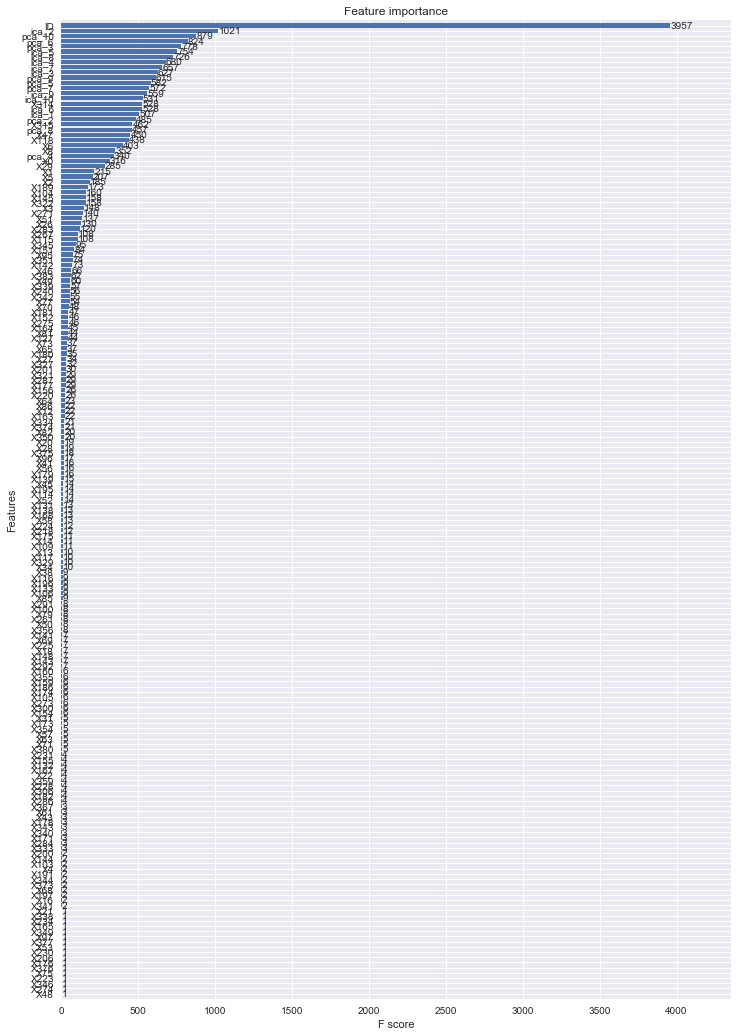

In [157]:
# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, height=0.8, ax=ax)
plt.show()

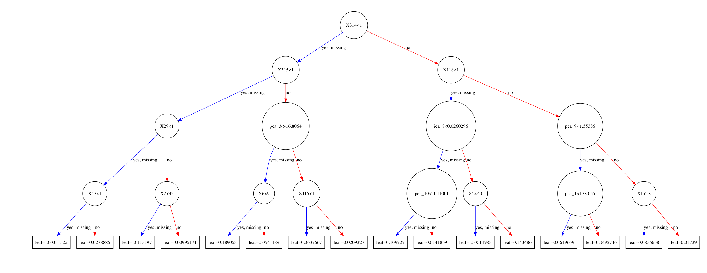

In [150]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_tree(ax=ax,booster=model)
plt.show()

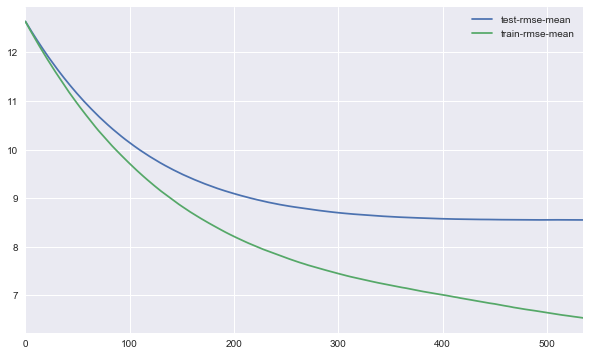

In [158]:
fig, ax = plt.subplots(figsize=(10,6))
cv_result[['test-rmse-mean','train-rmse-mean']].plot(ax = ax)

Categorical occupy the top spots followed by binary variables. 